# **Shopping Cart Database Deep Analysis - Knightbearr**

# **Introduction**


بسم الله الرحمن الرحيم

السلام عليكم ورحمة الله وبركاته

Hello fellow kagglers! My name is Azmi, this is my second public notebook Deep Analysis that I made, please give me an upvote if you like it! and please, leave me your feedback, Hope you like it! In this notebook we're going to Analyst Shopping Cart Database by doing so we're going to get some insights.

I'm planning to go through feature (question) by feature and take closer look those features to inspect their relationships with previous features. So it's gonna take a while to finish this notebook with all features involved. I'm planning to update it regulary whenever I have free time.

*Sorry if my English is bad :') hope you like it!*

# **Context**

This dataset contains synthetic data generated by the Dataset Owner for one of the courses at Carnegie Mellon University.

# **Content**

Example file structure
```
shopping_car_data <- top level folder
└───customer.csv
│   └───customers data     
└───orders.csv
│   └───orders data  
└───product.csv
│   └───product data  
└───sales.csv
    └───sales data  
 ```

# **Inspiration**

Several deductions and analyses can be drawn from this data, including:

* Which products were sold the most in the last month?
* How have sales and revenue changed over the past few quarters?
* Understanding Customer demographics and their preferences

Okay, let's get started....

# **Import Libraries**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

print("setup-complete!")

setup-complete!


# **Read-in Data**

In [2]:
# Accomodate raw path to variables
raw_customer, raw_orders = "../input/shopping-cart-database/customers.csv", "../input/shopping-cart-database/orders.csv"
raw_products, raw_sales = "../input/shopping-cart-database/products.csv", "../input/shopping-cart-database/sales.csv"

# Read-in data
customer, order = pd.read_csv(raw_customer), pd.read_csv(raw_orders)
product, sales = pd.read_csv(raw_products), pd.read_csv(raw_sales)

## **Merging data**

Let's merge customer data and orders data since they both have the same rows...

In [3]:
cust_order = pd.merge(left=customer, right=order, 
                      left_index=True, right_index=True) # merging
cop_data = pd.merge(left=cust_order, right=product, 
                    left_index=True, right_index=True) # merging

# **Check Data**

Let's see the data and how it looks.

In [4]:
cop_data # check customer, order, and product data

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,433,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,441,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,345,37843,2021-1-13,2021-02-02,995,Trousers,Wool,XS,green,111,73,"A green coloured, XS sized, Wool Trousers"
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,346,53831,2021-1-18,2021-01-31,996,Trousers,Wool,S,green,111,43,"A green coloured, S sized, Wool Trousers"
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,407,53308,2021-5-5,2021-05-21,997,Trousers,Wool,M,green,111,41,"A green coloured, M sized, Wool Trousers"
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,428,31643,2021-6-15,2021-07-12,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers"


In [5]:
sales # let's check sales data

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339
...,...,...,...,...,...,...
4995,4995,998,321,109,2,218
4996,4996,998,251,95,3,285
4997,4997,999,872,113,1,113
4998,4998,999,998,106,2,212


In [6]:
cop_data.info() # Getting the information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_ID     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

In [7]:
sales.info() # Getting the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


### **Uniqueness Categorical Variables**
Let's have a look at categorical variables. How many unique values of these variables.

In [8]:
categorical = cop_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {cop_data[cat_col].nunique()} uniqueness variable(s)")

customer_name : 1000 uniqueness variable(s)
gender : 8 uniqueness variable(s)
home_address : 1000 uniqueness variable(s)
city : 961 uniqueness variable(s)
state : 8 uniqueness variable(s)
country : 1 uniqueness variable(s)
order_date : 291 uniqueness variable(s)
delivery_date : 305 uniqueness variable(s)
product_type : 3 uniqueness variable(s)
product_name : 28 uniqueness variable(s)
size : 5 uniqueness variable(s)
colour : 7 uniqueness variable(s)
description : 1000 uniqueness variable(s)


Great!, let's check the Discrete and the Continuous variables...

### **Discrete and Continuous Variables**
Let's have a look at Discrete and Continuous variables.

In [9]:
numeric = sales.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {sales[num_col].nunique()} uniqueness variable(s)")

sales_id : 5000 uniqueness variable(s)
order_id : 993 uniqueness variable(s)
product_id : 1233 uniqueness variable(s)
price_per_unit : 23 uniqueness variable(s)
quantity : 3 uniqueness variable(s)
total_price : 69 uniqueness variable(s)


Okay, look like there's no unique variable(s) in Discrete and Continuous data...

### **How many missing data points do we have?**

Let's see how many missing data we have in each column....

In [10]:
# Get the number of missing data points per column
missing_values_count = cop_data.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
dtype: int64

In [11]:
# Get the number of missing data points per column
missing_values_count = sales.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

Great! look like the data is not have any missing values! okay, let's go to the next steps!

### **Convert Order Date column**
And let's convert Order Date column too, so we can take the Year, Month, and the other date easily.

In [12]:
# Convert it using to_datetime() function
cop_data["order_date"], cop_data["delivery_date"] = pd.to_datetime(cop_data["order_date"]), pd.to_datetime(cop_data["delivery_date"])
# Let's see it
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   datetime64[ns]
 14  product_ID     1000 non-null   int64         
 15  product_type   1000 no

### **Recap Data**

This is some point that we have.

#### **Costumer, Order, and Products Data:**

* We have total $1000$ rows and $22$ columns
* There's no missing value(s)
* customer_name : $1000$ uniqueness variable(s)
* gender : $8$ uniqueness variable(s)
* home_address : $1000$ uniqueness variable(s)
* city : $961$ uniqueness variable(s)
* state : $8$ uniqueness variable(s)
* country : $1$ uniqueness variable(s)
* order_date : $291$ uniqueness variable(s)
* delivery_date : $305$ uniqueness variable(s)
* product_type : $3$ uniqueness variable(s)
* product_name : $28$ uniqueness variable(s)
* size : $5$ uniqueness variable(s)
* colour : $7$ uniqueness variable(s)
* description : $1000$ uniqueness variable(s)

### **Sales Data:**

* There's no missing value(s)
* It's not have a uniqueness value(s)
* All data type in these data is Int$64$

Next, we will try to do some exploration and visualization. But we need to do some Data Preparation first.

# **Data Preparation**

Let's prepare the data before we visualize and do another stuff...

In [13]:
cop_data["sales"] = cop_data["price"] * cop_data["quantity"] # let's make a sales data
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042


In [14]:
# let's get the year data in order date column
cop_data['year_order'] = cop_data['order_date'].dt.year

# let's get the month data in order date column
cop_data['month_order'] = cop_data['order_date'].dt.month

# Let's get the day data in order date column
cop_data["day_order"] = cop_data["order_date"].dt.day

In [15]:
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3


In [16]:
# let's get the year data in delivery date column
cop_data['year_delivery'] = cop_data['delivery_date'].dt.year

# let's get the month data in delivery date column
cop_data['month_delivery'] = cop_data['delivery_date'].dt.month

# Let's get the day data in delivery date column
cop_data["day_delivery"] = cop_data["delivery_date"].dt.day

In [17]:
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3,2021,2,13


Okay, I think, now we have every column that we want to use for the analysis, let's move on to the next steps...

# **Data Analysis**

Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. Indeed, researchers generally analyze for patterns in observations through the entire data collection phase (Savenye, Robinson, $2004$).
analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

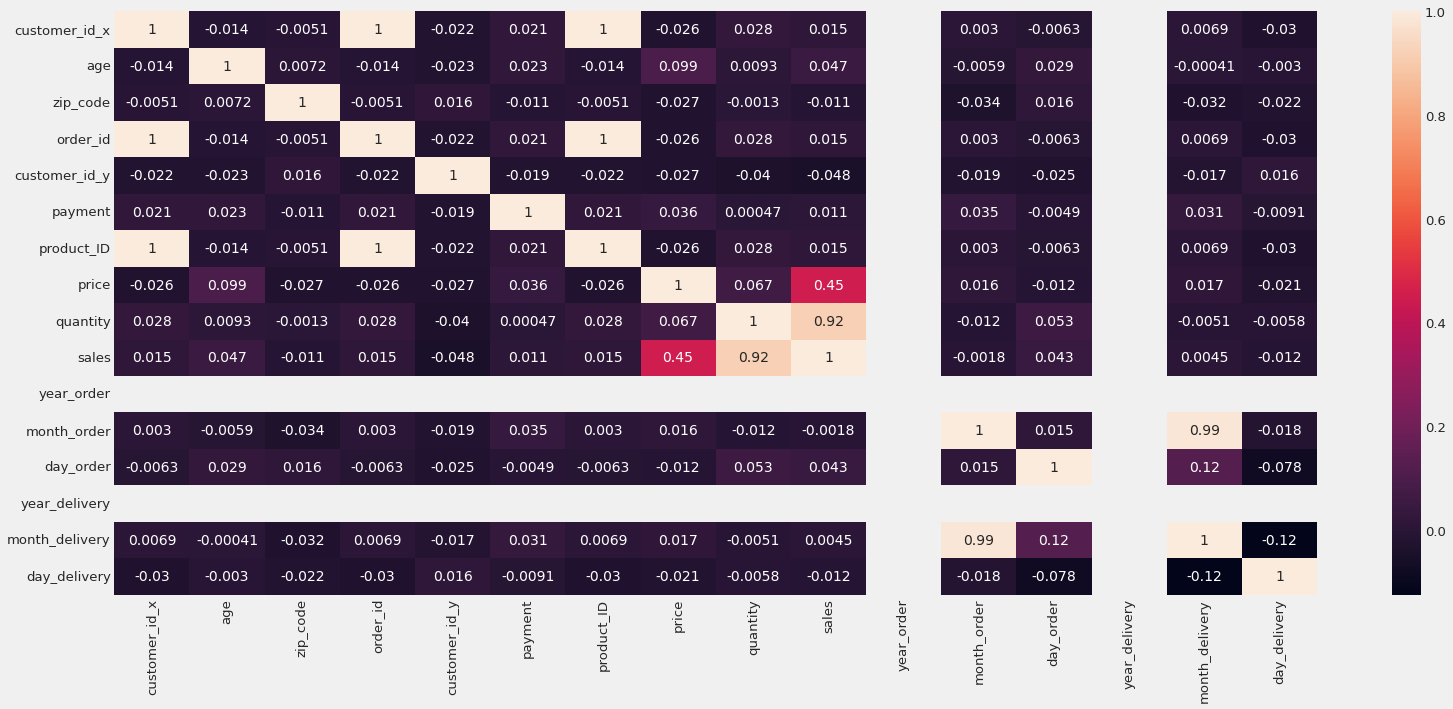

In [18]:
# let's make a correlation matrix for `cop_data`
plt.figure(figsize=(24, 10))
sns.heatmap(cop_data.corr(), annot=True);

In [19]:
cop_data.corr()["sales"].sort_values(ascending=False) # Let's see the correlation from `cop_data`

sales             1.000000
quantity          0.918043
price             0.450207
age               0.047032
day_order         0.042621
customer_id_x     0.015294
order_id          0.015294
product_ID        0.015294
payment           0.011012
month_delivery    0.004460
month_order      -0.001763
zip_code         -0.010807
day_delivery     -0.012453
customer_id_y    -0.047699
year_order             NaN
year_delivery          NaN
Name: sales, dtype: float64

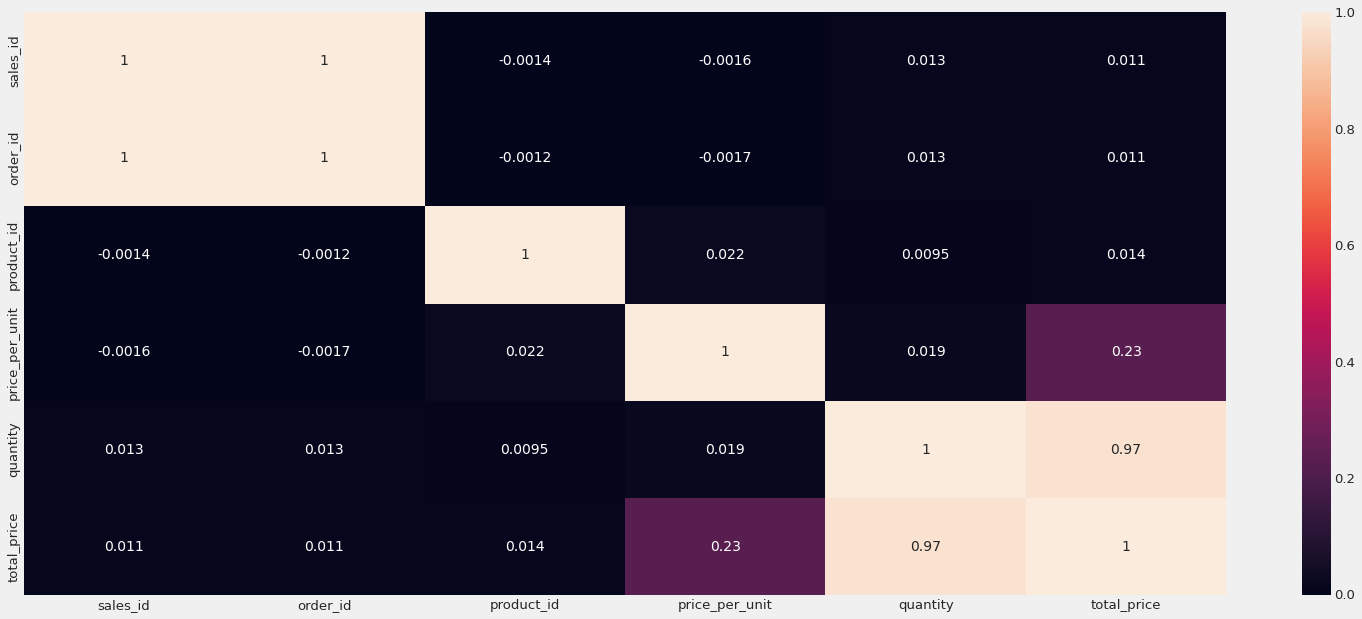

In [20]:
# let's make a correlation matrix for `sales`
plt.figure(figsize=(24, 10))
sns.heatmap(sales.corr(), annot=True);

In [21]:
sales.corr()["total_price"].sort_values(ascending=False) # Let's see the correlation

total_price       1.000000
quantity          0.973141
price_per_unit    0.232178
product_id        0.013958
order_id          0.011283
sales_id          0.011228
Name: total_price, dtype: float64

Great!, let's have a look for the Statistical Measure...

## **Statistical Measure**

Let's have a look to the statistical measure in both of data...

In [22]:
cop_data.describe(include=[np.number]) # Let's have a look to the discrete and continuous data first

,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000,500.500000,506.640000,33972.936000,499.500000,108.095000,60.371000,6532.937000,2021.0,5.376000,15.562000,2021.0,5.841000,15.508000
std,288.819436,17.647828,2884.497332,288.819436,277.115502,14451.609047,288.819436,9.158048,11.606812,1408.645064,0.0,2.847584,8.614776,0.0,2.907606,8.636813
min,1.000000,20.000000,2.000000,1.000000,1.000000,10043.000000,0.000000,90.000000,40.000000,3690.000000,2021.0,1.000000,1.000000,2021.0,1.000000,1.000000
25%,250.750000,34.000000,2401.750000,250.750000,275.250000,21329.250000,249.750000,102.000000,50.000000,5405.000000,2021.0,3.000000,8.000000,2021.0,3.000000,8.000000
50%,500.500000,50.000000,5083.000000,500.500000,515.000000,33697.500000,499.500000,112.000000,61.000000,6454.000000,2021.0,5.000000,16.000000,2021.0,6.000000,15.000000
75%,750.250000,65.000000,7460.250000,750.250000,737.250000,46249.000000,749.250000,115.000000,70.000000,7656.750000,2021.0,8.000000,23.000000,2021.0,8.000000,23.000000
max,1000.000000,80.000000,9998.000000,1000.000000,1000.000000,59910.000000,999.000000,119.000000,80.000000,9520.000000,2021.0,10.000000,31.000000,2021.0,11.000000,31.000000


Hmm.. okay, next..

In [23]:
sales.describe(include=[np.number]) # Let's have a look to sales data

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Great! let's have a look to the categorical type...

In [24]:
cop_data.describe(exclude=[np.number]) # Let's have a look to categorical data

,customer_name,gender,home_address,city,state,country,order_date,delivery_date,product_type,product_name,size,colour,description
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,8,1000,961,8,1,291,305,3,28,5,7,1000
top,Leanna Busson,Male,8606 Victoria TerraceSuite 560,East Sophia,South Australia,Australia,2021-06-20 00:00:00,2021-08-09 00:00:00,Shirt,Denim,XS,red,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,1,143,1,3,139,1000,10,9,420,70,200,145,1
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN,NaN,NaN,NaN,NaN


In [25]:
try:
    sales.describe(exclude=[np.number]) # Let's see on sales data
except ValueError as error:
    print(error)

No objects to concatenate


Okay, we know that on the sales data is not categorical type, but, just for sure, I'm check it twice..

Okay let's go to the univariate analysis...

## **Univariate Analysis**

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

In [26]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """
    
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set(title=title1) # set the title 1
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set(title=title2) # set the title 2
    
    return fig # returning the figure

## **Customer, Order, and Product Data**

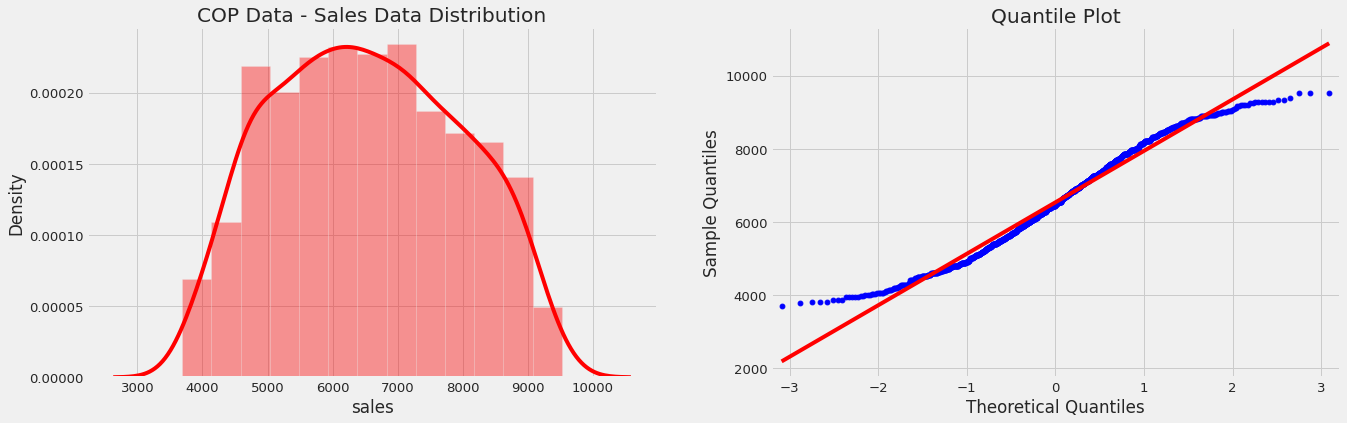

In [27]:
# Sales Data
univariate_analysis( # call the function
    data=cop_data['sales'], # put the data
    color='red', # pick the color
    title1='COP Data - Sales Data Distribution', # title1
    title2='Quantile Plot'); # title2

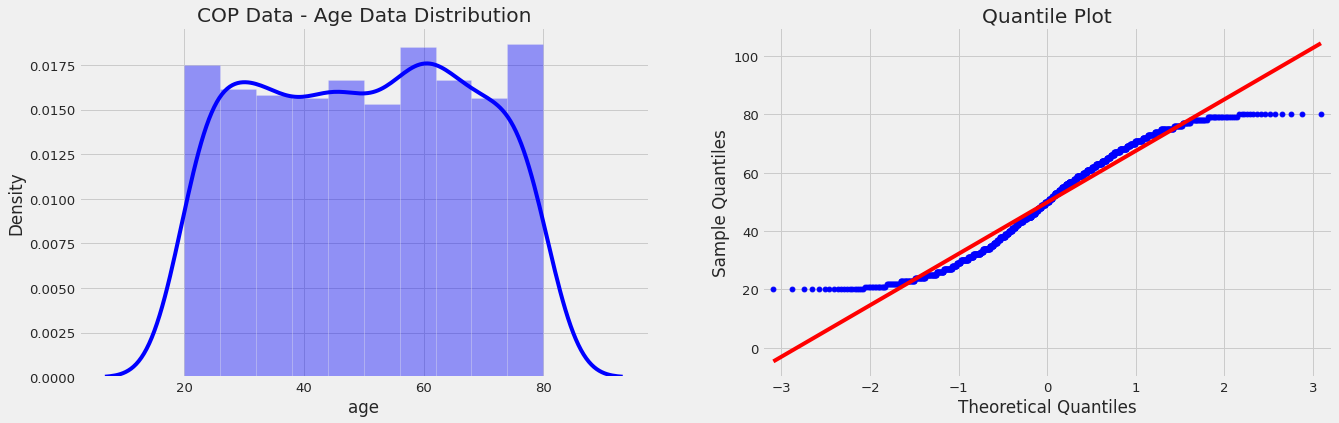

In [28]:
# Age Data
univariate_analysis( # call the function
    data=cop_data['age'], # put the data
    color='blue', # pick the color
    title1='COP Data - Age Data Distribution', # title1
    title2='Quantile Plot'); # title2

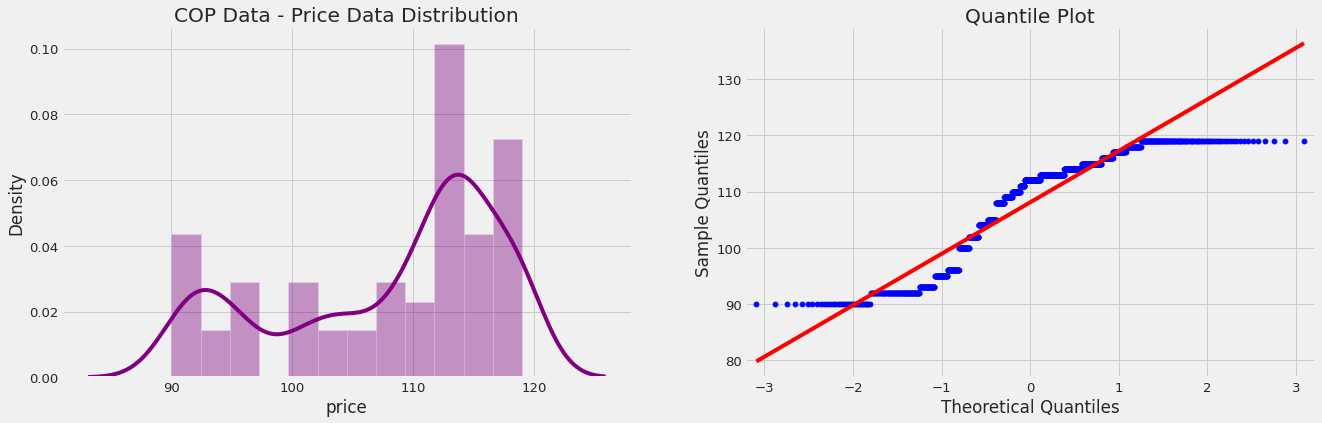

In [29]:
# Price Data
univariate_analysis( # call the function
    data=cop_data['price'], # put the data
    color='purple', # pick the color
    title1='COP Data - Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

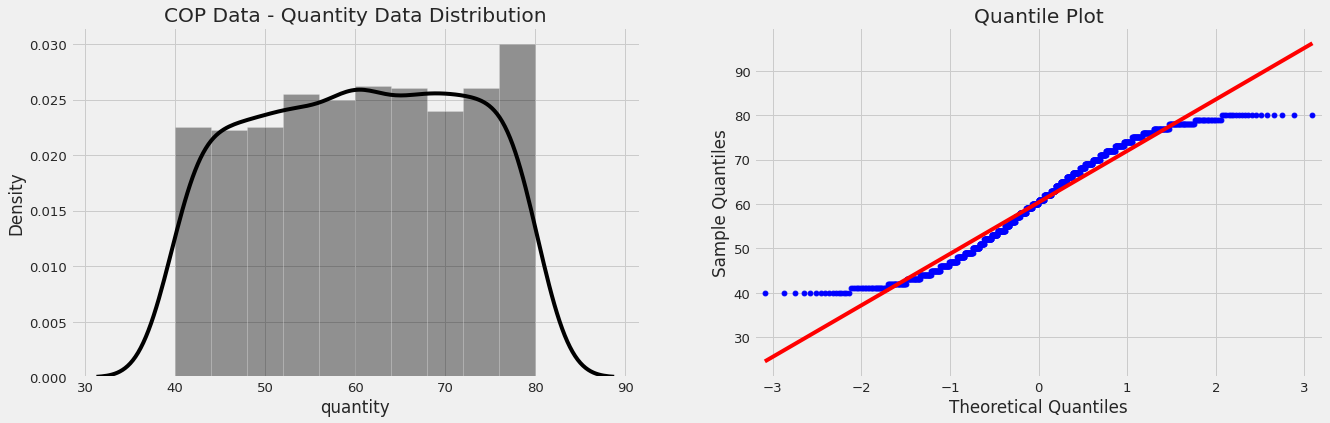

In [30]:
# Quantity Data
univariate_analysis( # call the function
    data=cop_data['quantity'], # put the data
    color='black', # pick the color
    title1='COP Data - Quantity Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [31]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = cop_data.skew().sort_values(ascending=False)
skew_value

sales             0.084784
day_delivery      0.059780
payment           0.059065
day_order         0.044548
month_order       0.020822
month_delivery    0.013124
customer_id_x     0.000000
order_id          0.000000
product_ID        0.000000
year_order        0.000000
year_delivery     0.000000
age              -0.009716
zip_code         -0.014961
quantity         -0.048909
customer_id_y    -0.069053
price            -0.683099
dtype: float64

Hmm, if we look the output above, look like the `sales` - `payment` and `customer_id_y` - `price` is skewed...

## **Sales Data**

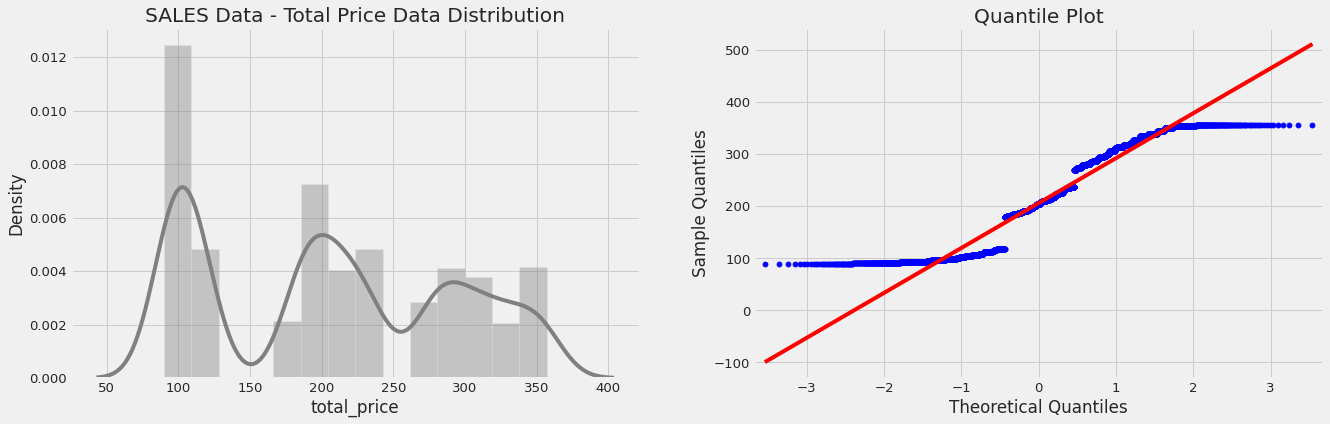

In [32]:
# Price Data
univariate_analysis( # call the function
    data=sales['total_price'], # put the data
    color='grey', # pick the color
    title1='SALES Data - Total Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

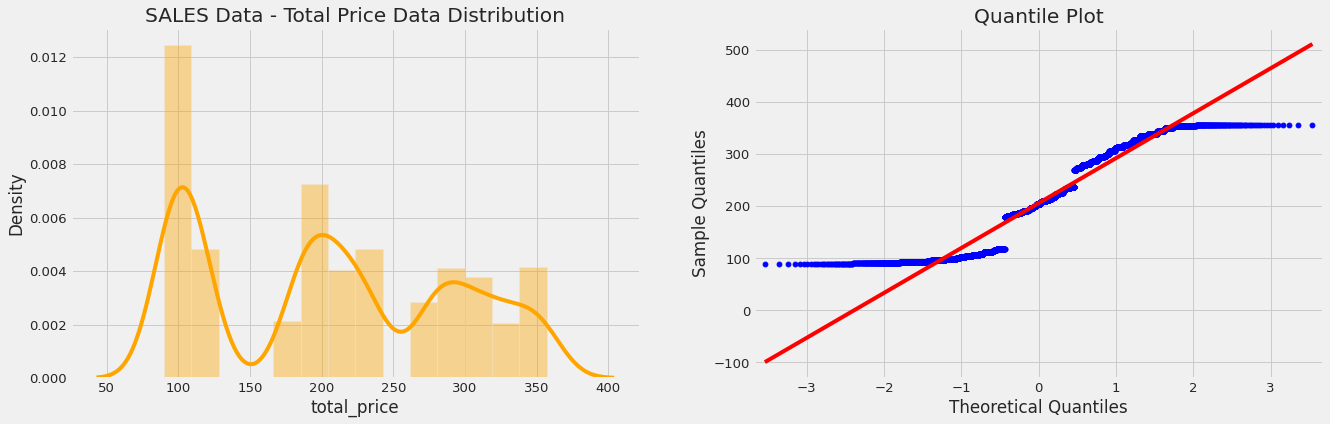

In [33]:
# Total Price Data
univariate_analysis( # call the function
    data=sales['total_price'], # put the data
    color='orange', # pick the color
    title1='SALES Data - Total Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

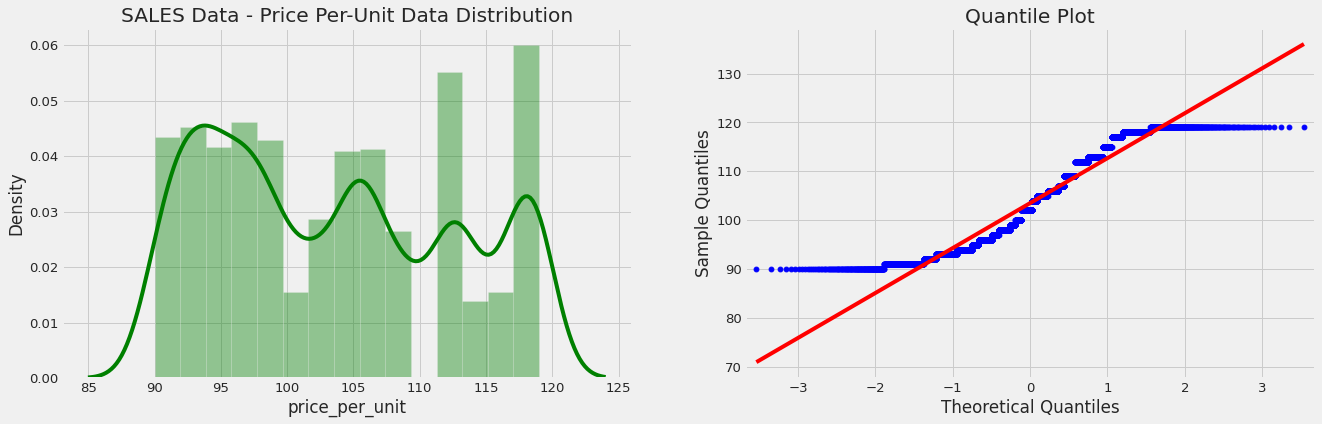

In [34]:
# Price per-unit Data
univariate_analysis( # call the function
    data=sales['price_per_unit'], # put the data
    color='green', # pick the color
    title1='SALES Data - Price Per-Unit Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [35]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = sales.skew().sort_values(ascending=False)
skew_value

price_per_unit    0.256430
total_price       0.137222
quantity          0.013805
sales_id          0.000000
order_id         -0.003729
product_id       -0.021139
dtype: float64

Hmm, great! `price_per_unit` - `quantity` is not skewed, otherwise skewed...

Okay, let's go to the Question that have been asked in Inspiration...

## **Q1: Which products were sold the most in the last month?**

In [36]:
cop_data.groupby(["month_order", "product_type"]).sum().astype('int').iloc[24:]

customer_id_x   age  zip_code  order_id  customer_id_y  payment  \
month_order product_type                                                                    
9           Jacket                24161  1744    193514     24161          20694  1285643   
            Shirt                 10561  2184    217607     10561          24084  1398650   
            Trousers              13495   830     78696     13495           8543   488889   
10          Jacket                21138  1762    161081     21138          16569  1197160   
            Shirt                  7745  1844    154652      7745          16971  1258450   
            Trousers              11987   648     48108     11987           6955   481001   

                          product_ID  price  quantity   sales  year_order  day_order  \
month_order product_type                                                               
9           Jacket             24123   4074      2335  251130       76798        621   
            Shirt              10516   4821      2763  297204       90945        686   
            Trousers           13480   1589       965  102689       30315        309   
10          Jacket             21105   3593      1983  216687       66693        412   
            Shirt               7710   3791      2084  225699       70735        520   
            Trousers           11974   1438       741   82129       26273        169   

                          year_delivery  month_delivery  day_delivery  
month_order product_type                                               
9           Jacket                76798             360           605  
            Shirt                 90945             426           675  
            Trousers              30315             147           223  
10          Jacket                66693             341           566  
            Shirt                 70735             367           567  
            Trousers              26273             136           178

## **Answer:**

The question is said that **Which products were sold the most in the last month?** that mean we're now in **October**, which mean the **last month** is **September** *(cmiiw)*, and if we see the output above, we can see that the most product that sold the most is a **Shirt**.

## **Q2: How have sales and revenue changed over the past few quarters?**

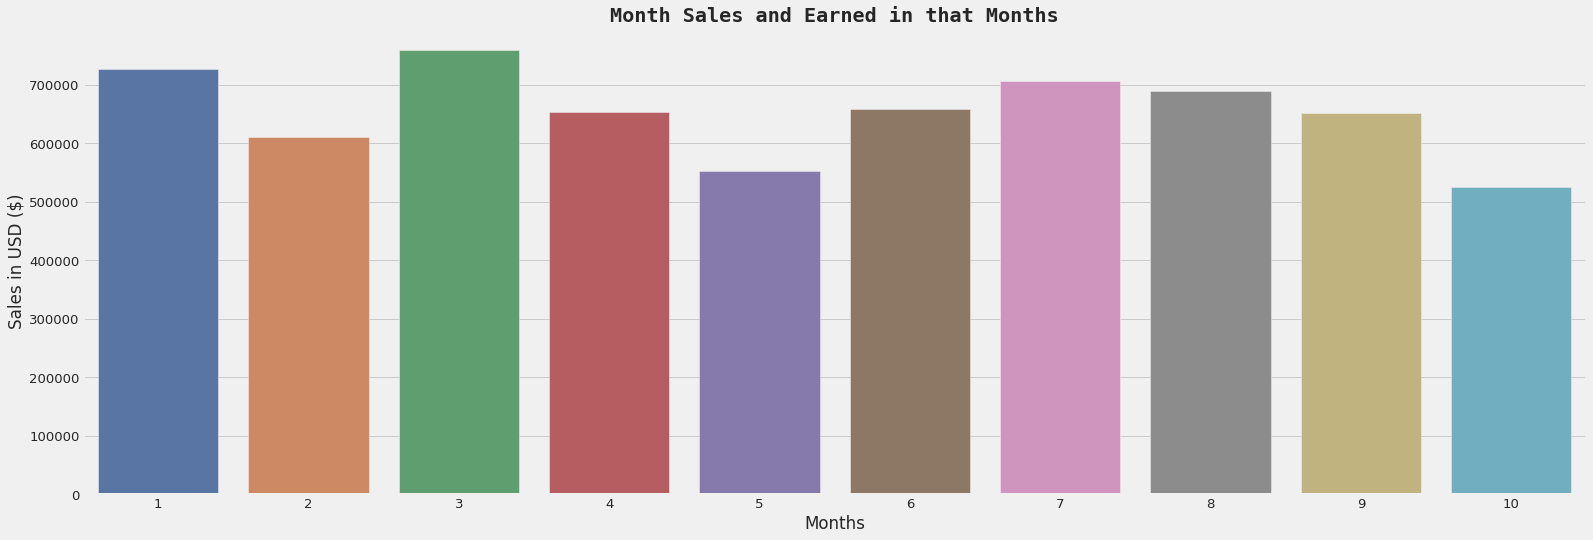

In [37]:
# group the Month cols
sum_month_order = cop_data.groupby(["month_order"]).sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 8)) # figuring the size
# makes bar plot 
sns.barplot(x=sum_month_order.index, 
            y=sum_month_order['sales'], 
            data=sum_month_order, palette='deep')
# title
plt.title('Month Sales and Earned in that Months', 
          fontname='monospace', weight='bold')
# x-label
plt.xlabel('Months')
# y-label
plt.ylabel('Sales in USD ($)');

## **Answer:**

If we look at the data visualization above, I think sales and revenue have changed over the last few quarters, you could say there were a few months that saw quite a big increase as well as a pretty big drop, the reason might be the pandemic. or locking. in some places, in Australia, and this is just my hypothesis because I haven't fully explored every possible cause and effect in the data, such as month, place, city and also the age of the person ordering the item.

## **Q3: Understanding Customer demographics and their preferences**

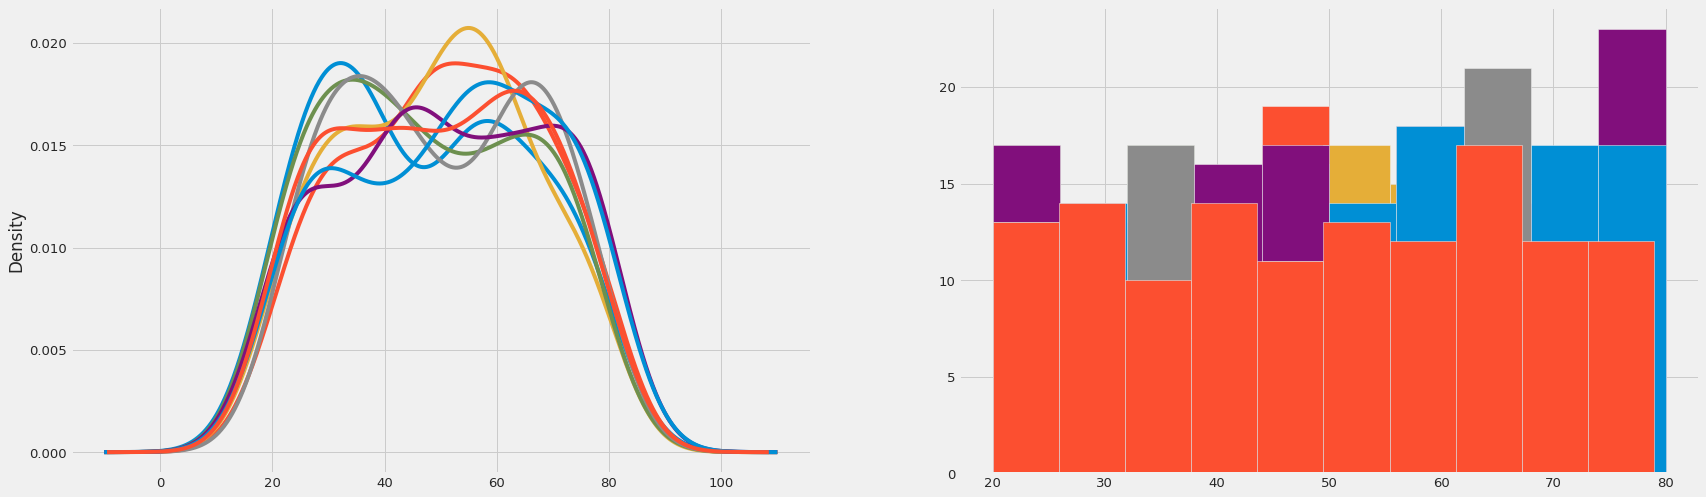

In [38]:
plt.figure(figsize=(26, 8))
plt.subplot(1, 2, 1)
cop_data.groupby("gender").age.plot(kind='kde');
plt.subplot(1, 2, 2)
cop_data.groupby("gender").age.hist();

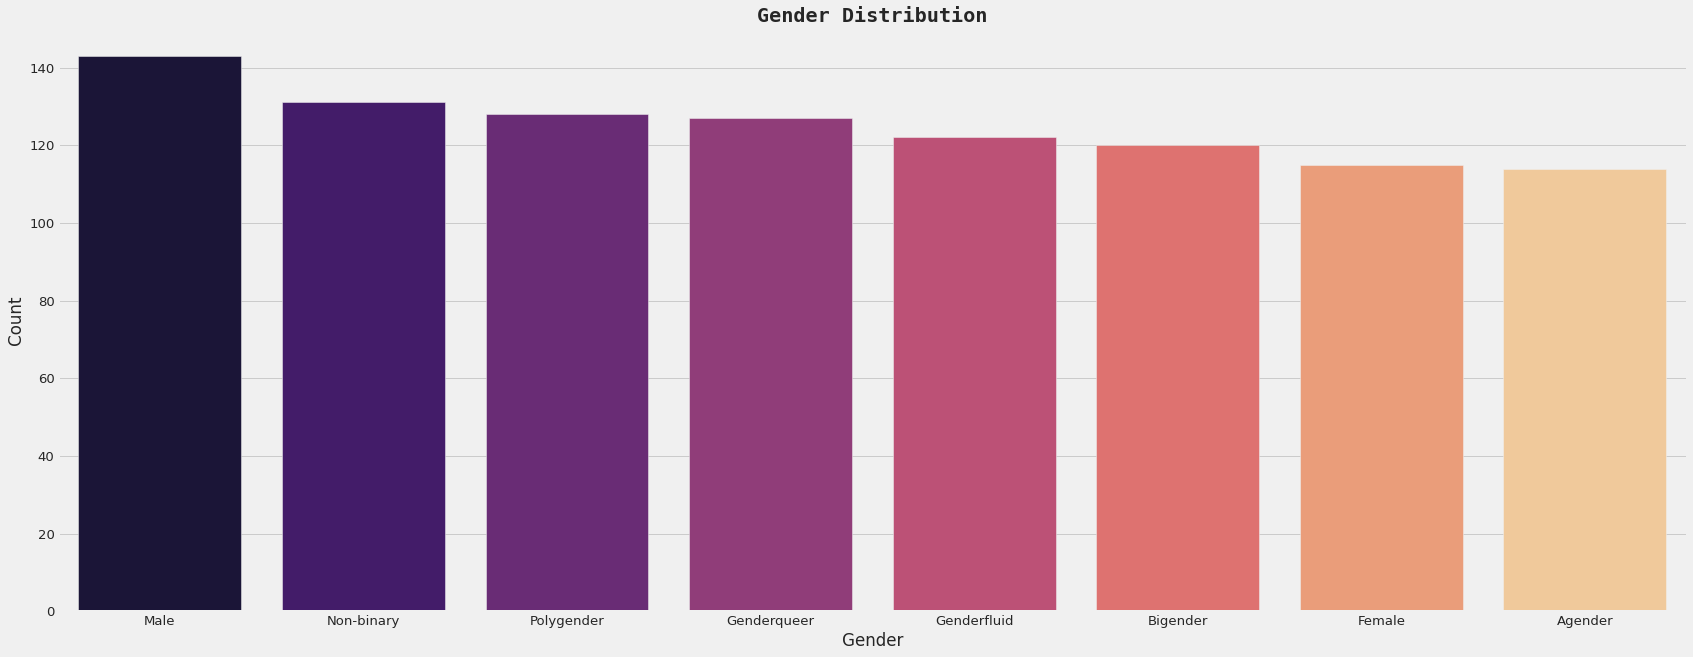

In [39]:
plt.figure(figsize=(26, 10))
sns.barplot(x=cop_data["gender"].value_counts().index,
            y=cop_data["gender"].value_counts().values,
            palette="magma")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution", fontname='monospace', weight='bold');

# **On Going...**